<a href="https://colab.research.google.com/github/Eskarteek/Eskarteek_DATA606/blob/main/EDA/Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my Notebook

In [ ]:
# pip install snscrape

In [ ]:
#pip install yfinance

In [1]:
# importing libraries and packages
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [76]:
#picking stock symbol
symbol = input("Enter the stock symbol: ")

Enter the stock symbol: TWTR


In [77]:
#Reading NASDAQ data
data = pd.read_csv('/content/nasdaq_screener_1645401938081.csv')

In [78]:
data_dict = {}

In [79]:
for i in range(len(data)):
  data_dict[data.iloc[i][0]] = [data.iloc[i][1], data.iloc[i][2]]

In [97]:
#Stock symbol and company name data.
data_dict

{'AACG': ['ATA Creativity Global American Depositary Shares', nan],
 'AACI': ['Armada Acquisition Corp. I Common Stock', 2021.0],
 'AACIW': ['Armada Acquisition Corp. I Warrant', 2021.0],
 'AADI': ['Aadi Bioscience Inc. Common Stock', nan],
 'AAL': ['American Airlines Group Inc. Common Stock', nan],
 'AAME': ['Atlantic American Corporation Common Stock', nan],
 'AAOI': ['Applied Optoelectronics Inc. Common Stock', 2013.0],
 'AAON': ['AAON Inc. Common Stock', nan],
 'AAPL': ['Apple Inc. Common Stock', 1980.0],
 'AATC': ['Autoscope Technologies Corporation Common Stock', nan],
 'AAWW': ['Atlas Air Worldwide Holdings NEW Common Stock', nan],
 'ABCB': ['Ameris Bancorp Common Stock', 1994.0],
 'ABCL': ['AbCellera Biologics Inc. Common Shares', 2020.0],
 'ABCM': ['Abcam plc American Depositary Shares', 2020.0],
 'ABEO': ['Abeona Therapeutics Inc. Common Stock', nan],
 'ABGI': ['ABG Acquisition Corp. I Class A Ordinary Shares', 2021.0],
 'ABIO': ['ARCA biopharma Inc. Common Stock', nan],
 'AB

In [80]:
#pip install yfinance

In [81]:
#importing yfinance API 
import yfinance as yf

In [82]:
#Scrapes all the news articles from yfinance website
inp = yf.Ticker(symbol)

In [83]:
inp.news

[{'link': 'https://finance.yahoo.com/news/teenager-explains-why-hes-taking-on-oligarchs-222914044.html',
  'providerPublishTime': 1646260154,
  'publisher': 'Yahoo Finance',
  'title': '19-year-old who irked Elon Musk explains why he’s taking on oligarchs',
  'type': 'STORY',
  'uuid': 'c1dc0210-4d4f-481a-993c-6029cb5b6fa1'},
 {'link': 'https://finance.yahoo.com/news/biden-scorns-defund-police-cities-210534064.html',
  'providerPublishTime': 1646255134,
  'publisher': 'Bloomberg',
  'title': 'Biden Scorns ‘Defund the Police’\xa0as Cities Rush to Spend on Cops',
  'type': 'STORY',
  'uuid': 'cfd5084a-e33e-3e3d-b2d2-8bf24d841073'},
 {'link': 'https://finance.yahoo.com/news/electronic-arts-removes-russian-teams-200749835.html',
  'providerPublishTime': 1646251669,
  'publisher': 'Bloomberg',
  'title': 'Electronic Arts Removes Russian Teams From FIFA, NHL Games',
  'type': 'STORY',
  'uuid': '0fac8d08-41a4-3f39-85c8-b1e406f5d85c'},
 {'link': 'https://finance.yahoo.com/news/hochul-hawks-dr

In [84]:
#Scraping text from news articles and titles using beautiful soup
df = pd.DataFrame()
title = []
newslist = []
for i in range(len(inp.news)):
  site = inp.news[i]['link']
  r = requests.get(site)
  soup = BeautifulSoup(r.text)
  try:
    newslist.append(soup.find('div', attrs={'class': 'caas-body'}).text)
    title.append(inp.news[i]['title'])
  except:
    pass
  

In [85]:
df['Title'] = title

In [86]:
df['News'] = newslist

In [87]:
df

,Title,News
0,19-year-old who irked Elon Musk explains why h...,The teenager who annoyed Tesla (TSLA) CEO Elon...
1,Biden Scorns ‘Defund the Police’ as Cities Rus...,(Bloomberg) -- President Joe Biden implored lo...
2,Electronic Arts Removes Russian Teams From FIF...,(Bloomberg) -- Electronic Arts Inc. will remov...
3,"Hochul Hawks To-Go Drinks, Speedier Liquor Lic...",(Bloomberg) -- New York’s hard-hit hospitality...
4,Ukraine Stance by U.S. Tech Firm Epam Sparks I...,(Bloomberg) -- Tension over the conflict in Uk...
5,Russia Demands U.K. Sell Stake in Satellite St...,(Bloomberg) -- Russia demanded the U.K. sell i...
6,Snap Joins Twitter in Stopping Ads in Russia a...,Snap said it has stopped all advertising in Ru...
7,Facebook Researchers Find Its Apps Can Make Us...,(Bloomberg) -- When Facebook hosted an interna...


In [88]:
# Using VADAR sentiment analyzer to detected sentiment scores in the text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [89]:
vader = SentimentIntensityAnalyzer()
scores = df['News'].apply(vader.polarity_scores).tolist()
df['Score'] = scores
#Adding these scores to the dataset

In [90]:
df

,Title,News,Score
0,19-year-old who irked Elon Musk explains why h...,The teenager who annoyed Tesla (TSLA) CEO Elon...,"{'neg': 0.058, 'neu': 0.874, 'pos': 0.069, 'co..."
1,Biden Scorns ‘Defund the Police’ as Cities Rus...,(Bloomberg) -- President Joe Biden implored lo...,"{'neg': 0.121, 'neu': 0.829, 'pos': 0.05, 'com..."
2,Electronic Arts Removes Russian Teams From FIF...,(Bloomberg) -- Electronic Arts Inc. will remov...,"{'neg': 0.042, 'neu': 0.913, 'pos': 0.045, 'co..."
3,"Hochul Hawks To-Go Drinks, Speedier Liquor Lic...",(Bloomberg) -- New York’s hard-hit hospitality...,"{'neg': 0.054, 'neu': 0.882, 'pos': 0.064, 'co..."
4,Ukraine Stance by U.S. Tech Firm Epam Sparks I...,(Bloomberg) -- Tension over the conflict in Uk...,"{'neg': 0.101, 'neu': 0.825, 'pos': 0.074, 'co..."
5,Russia Demands U.K. Sell Stake in Satellite St...,(Bloomberg) -- Russia demanded the U.K. sell i...,"{'neg': 0.075, 'neu': 0.882, 'pos': 0.043, 'co..."
6,Snap Joins Twitter in Stopping Ads in Russia a...,Snap said it has stopped all advertising in Ru...,"{'neg': 0.113, 'neu': 0.85, 'pos': 0.037, 'com..."
7,Facebook Researchers Find Its Apps Can Make Us...,(Bloomberg) -- When Facebook hosted an interna...,"{'neg': 0.11, 'neu': 0.773, 'pos': 0.117, 'com..."


In [91]:
#Predicting Polarity (0: Neutal , Positive: 1,Negative: -1)
pn = []
for i in df['Score']:
    if i['compound'] > 0:    
        pn.append(1)
    elif i['compound'] < 0:
        pn.append(-1)
    else:
      pn.append(0)

In [92]:
#Appending them to the dataset
df['Sentiment Poles'] = pn

In [93]:
df

,Title,News,Score,Sentiment Poles
0,19-year-old who irked Elon Musk explains why h...,The teenager who annoyed Tesla (TSLA) CEO Elon...,"{'neg': 0.058, 'neu': 0.874, 'pos': 0.069, 'co...",1
1,Biden Scorns ‘Defund the Police’ as Cities Rus...,(Bloomberg) -- President Joe Biden implored lo...,"{'neg': 0.121, 'neu': 0.829, 'pos': 0.05, 'com...",-1
2,Electronic Arts Removes Russian Teams From FIF...,(Bloomberg) -- Electronic Arts Inc. will remov...,"{'neg': 0.042, 'neu': 0.913, 'pos': 0.045, 'co...",1
3,"Hochul Hawks To-Go Drinks, Speedier Liquor Lic...",(Bloomberg) -- New York’s hard-hit hospitality...,"{'neg': 0.054, 'neu': 0.882, 'pos': 0.064, 'co...",1
4,Ukraine Stance by U.S. Tech Firm Epam Sparks I...,(Bloomberg) -- Tension over the conflict in Uk...,"{'neg': 0.101, 'neu': 0.825, 'pos': 0.074, 'co...",-1
5,Russia Demands U.K. Sell Stake in Satellite St...,(Bloomberg) -- Russia demanded the U.K. sell i...,"{'neg': 0.075, 'neu': 0.882, 'pos': 0.043, 'co...",-1
6,Snap Joins Twitter in Stopping Ads in Russia a...,Snap said it has stopped all advertising in Ru...,"{'neg': 0.113, 'neu': 0.85, 'pos': 0.037, 'com...",-1
7,Facebook Researchers Find Its Apps Can Make Us...,(Bloomberg) -- When Facebook hosted an interna...,"{'neg': 0.11, 'neu': 0.773, 'pos': 0.117, 'com...",1


In [94]:
# Data cleaning
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
sw = nltk.corpus.stopwords.words("english")
lemma = nltk.stem.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [95]:
#pip install nltk
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

The teenager who annoyed Tesla (TSLA) CEO Elon Musk by posting the location of his private jet on Twitter (TWTR) is now taking on Russia’s oligarchs. And he’s not scared of Russian President Vladimir Putin or his cronies.“We're here in the United States,” 19-year-old Jack Sweeney told Yahoo Finance. “If someone threatens me, I'm going to be protected.”Sweeney first skyrocketed to social media fame in January with his Twitter account @ElonJet, a bot that posts the location of the Tesla CEO’s private jet. When Musk learned of the account, he offered Sweeney $5,000 to shut it down. Sweeney countered by first asking for $50,000, and then offering to drop the account in exchange for an internship at Tesla. Musk blocked him.Now the teen is using his skills to target Russian oligarchs who are reportedly moving their private jets around to avoid Western authorities via his @RUOligarchJets and @PutinJet account.“There were people asking me to do the oligarchs, so I did it,” Sweeney said. “I see

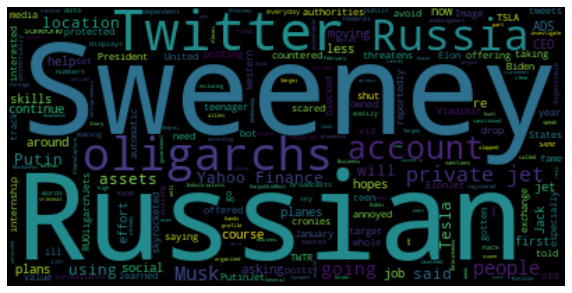

[('Russian', 10), ('Sweeney', 9), ('private', 6), ('Twitter', 5), ('account', 4), ('people', 4), ('Musk', 3), ('location', 3), ('jet', 3), ('he’s', 3), ('Putin', 3), ('Yahoo', 3), ('using', 3), ('Russia', 3), ('Tesla', 2), ('oligarchs.', 2), ('And', 2), ('going', 2), ('first', 2), ('social', 2)]
(Bloomberg) -- President Joe Biden implored local governments to fund police departments during his State of the Union address on Tuesday. Major cities, though, had already gotten the message.Most Read from BloombergChina Holds Talks With Ukraine, Further Edging Away From RussiaU.S. Delays ICBM Test to Avoid Russia Confusion: Ukraine UpdateChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsBiden Assails Putin, Pledges Inflation Fight in State of Union“The answer is not to defund the police. It’s to fund the police,” Biden said, sparking raucous applause that brought both House Speaker Nancy Pelosi and Minority L

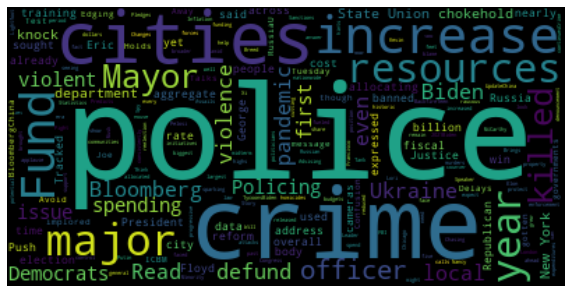

[('police', 11), ('crime', 7), ('city', 5), ('increase', 5), ('U.S.', 4), ('since', 4), ('Mayor', 4), ('killed', 4), ('State', 3), ('them.', 3), ('resource', 3), ('major', 3), ('2021', 3), ('Democrats', 3), ('violent', 3), ('New', 3), ('chokehold', 3), ('no-knock', 3), ('officer', 3), ('Biden', 2)]
(Bloomberg) -- Electronic Arts Inc. will remove Russian teams from several of its video game sports franchises in response to the country’s invasion of Ukraine.Most Read from BloombergFitch And Moody’s Cut Russia’s Rating to Junk: Ukraine UpdateChina Holds Talks With Ukraine, Further Edging Away From RussiaChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireBillionaire Roman Abramovich Says He’s Selling Chelsea Football ClubTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsThe game publisher said it will expunge all of Russia’s teams from its NHL 22 hockey game and three of its FIFA football games. EA’s actions follow the banning of actual Russian sports team

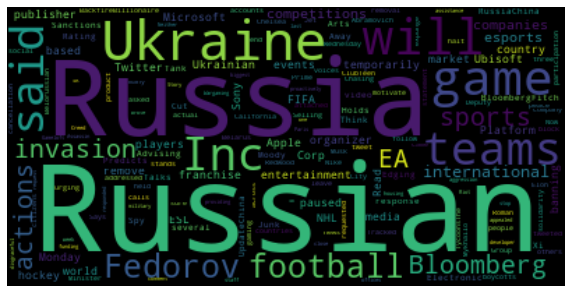

[('Russian', 12), ('also', 6), ('team', 5), ('said', 5), ('game', 4), ('Ukraine', 4), ('Russia', 4), ('company', 4), ('Inc.', 3), ('action', 3), ('international', 3), ('Fedorov', 3), ('esports', 3), ('The', 3), ('remove', 2), ('sport', 2), ('franchise', 2), ('invasion', 2), ('Read', 2), ('Russia’s', 2)]
(Bloomberg) -- New York’s hard-hit hospitality industry stands to get a lift from a proposal that Governor Kathy Hochul laid out Wednesday: boosting staff at the state agency that approves applications for liquor licenses.Most Read from BloombergChina Holds Talks With Ukraine, Further Edging Away From RussiaChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsBiden Assails Putin, Pledges Inflation Fight in State of UnionMicrosoft Says Son of CEO Satya Nadella Has Died at 26Hochul announced a plan to add $2 million to the State Liquor Authority’s budget, doubling the staff responsible for processing liquor-

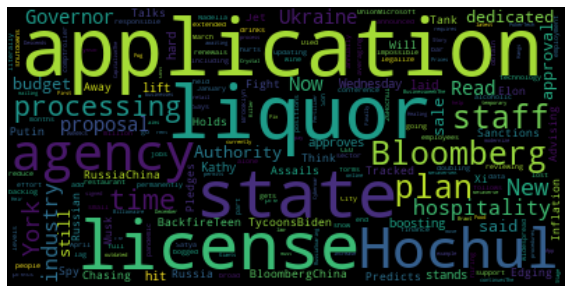

[('Hochul', 4), ('application', 4), ('liquor', 4), ('staff', 3), ('plan', 3), ('processing', 3), ('New', 2), ('hospitality', 2), ('get', 2), ('proposal', 2), ('state', 2), ('agency', 2), ('Read', 2), ('From', 2), ('State', 2), ('Has', 2), ('also', 2), ('agency’s', 2), ('30', 2), ('dedicated', 2)]
(Bloomberg) -- Tension over the conflict in Ukraine -- and the role U.S. companies should play in opposing Russia’s invasion -- is playing out within Epam Systems Inc., a Pennsylvania-based company with a large work force in Ukraine.Most Read from BloombergChina Holds Talks With Ukraine, Further Edging Away From RussiaFitch And Moody’s Cut Russia’s Rating to Junk: Ukraine UpdateChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireBillionaire Roman Abramovich Says He’s Selling Chelsea Football ClubTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsDozens of current and former Epam employees sharply criticized a LinkedIn post from the company’s chief executive offi

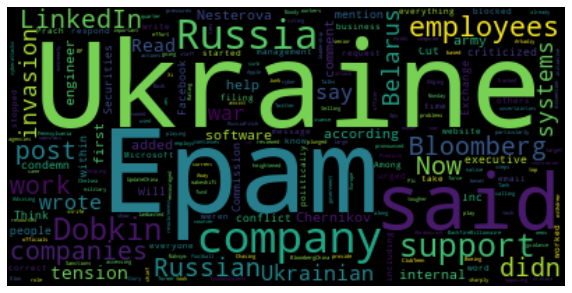

[('said', 15), ('Epam', 14), ('company', 13), ('Ukraine', 7), ('support', 7), ('Russia’s', 6), ('Ukraine,', 6), ('company’s', 6), ('--', 5), ('employee', 5), ('didn’t', 5), ('I', 5), ('U.S.', 4), ('Russian', 4), ('post', 4), ('Russia,', 4), ('wrote', 4), ('Bloomberg', 4), ('war', 4), ('work', 3)]
(Bloomberg) -- Russia demanded the U.K. sell its stake in satellite startup OneWeb Ltd. and threatened to cancel a launch planned for Saturday if it didn’t, retaliating against Western sanctions following the invasion of Ukraine.Most Read from BloombergChina Holds Talks With Ukraine, Further Edging Away From RussiaU.S. Delays ICBM Test to Avoid Russia Confusion: Ukraine UpdateChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsBillionaire Roman Abramovich Says He’s Selling Chelsea Football ClubKremlin space agency Roscosmos made the ultimatum in a statement on its official Twitter page on Wednesday and blamed “t

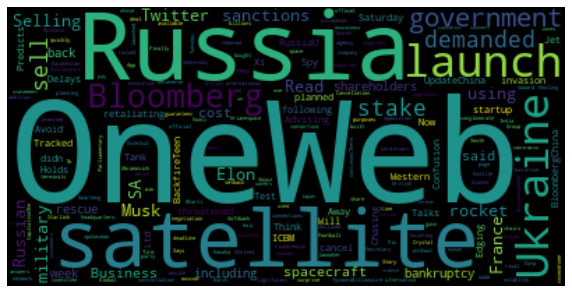

[('U.K.', 4), ('satellite', 4), ('would', 4), ('Russia', 3), ('launch', 3), ('demanded', 2), ('sell', 2), ('OneWeb', 2), ('Read', 2), ('Ukraine', 2), ('Russian', 2), ('OneWeb’s', 2), ('military', 2), ('using', 2), ('France’s', 2), ('said', 2), ('government', 2), ('rescue', 2), ('week', 2), ('including', 2)]
Snap said it has stopped all advertising in Russia, Belarus, and Ukraine, as the Snapchat parent became the latest social-media company to take steps to fight misinformation in Eastern Europe. Snap (ticker: SNAP) issued a statement standing in solidarity with the people of Ukraine and detailing new measures in light of Russia’s invasion of the country.


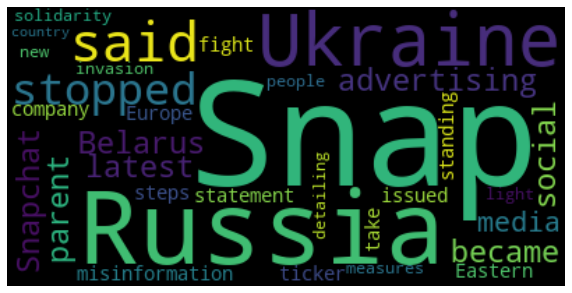

[('Snap', 2), ('said', 1), ('stopped', 1), ('advertising', 1), ('Russia,', 1), ('Belarus,', 1), ('Ukraine,', 1), ('Snapchat', 1), ('parent', 1), ('became', 1), ('latest', 1), ('social-media', 1), ('company', 1), ('take', 1), ('step', 1), ('fight', 1), ('misinformation', 1), ('Eastern', 1), ('Europe.', 1), ('(ticker:', 1)]
(Bloomberg) -- When Facebook hosted an internal competition a few years ago to develop new product ideas, a handful of employees teamed up to build a robot named Max.Most Read from BloombergChina Holds Talks With Ukraine, Further Edging Away From RussiaU.S. Delays ICBM Test to Avoid Russia Confusion: Ukraine UpdateChina Spy Think Tank Advising Xi Predicts Russia Sanctions Will BackfireTeen Who Tracked Elon Musk’s Jet Is Now Chasing Russian TycoonsBiden Assails Putin, Pledges Inflation Fight in State of UnionShaped like a small, upside-down bowl, Max was designed to be a companion — a physical device humans could talk to that could detect their mood, according to two p

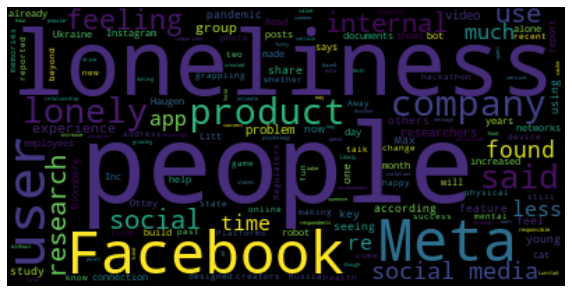

[('people', 19), ('social', 16), ('Facebook', 14), ('user', 14), ('loneliness', 10), ('like', 9), ('The', 9), ('also', 9), ('company', 8), ('Meta’s', 8), ('product', 7), ('—', 7), ('Meta', 7), ('use', 7), ('medium', 7), ('said', 7), ('internal', 6), ('research', 6), ('feeling', 6), ('much', 6)]


In [96]:
#Visualizing using wordcloud and finding key words in the text
for text in df['News']:
  print(text)
  words = text.split(' ')
  words = [word for word in words if word not in sw]
  words = [lemma.lemmatize(word) for word in words]
  fdist1 = nltk.FreqDist(words)
  plt.figure(figsize = (10,6))
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print (fdist1.most_common(20))